# **Proyecto**

## *Detección y clasificación de Queratocono*

#### Zahid Medrano Flores  <p align="right">zahidmedrano@ciencias.unam.mx &emsp;</p>

## **Introducción**

que es el queratocono bla bla bla

## **Problema**

bla bla bla bla

## **¿Cómo se hará?**

### **Preprocesamiento de los datos**

Primero se cargan las librerias que utilizaremos a lo largo del trabajo. Y simplemente comenzamos cargando los datos.

In [59]:
# librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, mutual_info_classif

In [60]:
#Cargamos los datos y las etiquetas
data = pd.read_csv(r"Datos/dataset.csv")
labels = pd.read_csv(r"Datos/labels.csv")

Información general del dataframe

In [61]:
data.head(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


In [62]:
data.tail(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
3152,12232,1809OS(Left),44.32,67,43.52,157,43.92,0.79,95.5,0.63,...,0.125,103,0.280,0.587,0.440,0.734,100,Enable,0,0
3153,12233,1810OS(Left),47.26,57,46.79,147,47.02,0.47,95.6,0.60,...,0.549,140,0.240,0.689,0.305,0.753,100,Enable,0,0
3154,12234,1810OD(Right),48.94,123,47.23,33,48.09,1.70,95.2,0.68,...,0.417,100,0.440,0.593,0.578,0.828,100,Enable,0,6
3155,12236,1811OS(Left),45.15,82,44.27,172,44.71,0.88,97.0,0.69,...,0.237,227,0.161,0.327,0.258,0.416,100,Enable,0,0
3156,12237,1812OS(Left),46.22,119,44.34,29,45.28,1.88,92.2,0.42,...,0.865,266,0.608,0.921,0.630,1.116,100,Enable,12,7
3157,12238,1812OD(Right),46.60,86,45.79,176,46.19,0.81,97.0,0.75,...,0.384,339,0.164,0.583,0.259,0.638,100,Enable,0,10
3158,12239,1813OS(Left),44.05,82,43.90,172,43.97,0.15,96.4,0.63,...,0.156,217,0.242,0.388,0.387,0.548,100,Enable,0,5
3159,12240,1813OD(Right),44.12,3,43.47,93,43.80,0.66,96.6,0.60,...,0.179,337,0.348,0.313,0.384,0.495,100,Enable,0,0
3160,12241,1814OS(Left),46.59,90,44.74,0,45.66,1.86,96.1,0.74,...,0.609,113,-0.124,1.092,0.842,1.379,100,Enable,0,0
3161,12242,1814OD(Right),46.49,79,45.38,169,45.93,1.11,96.5,0.73,...,0.280,56,0.001,0.726,0.348,0.805,100,Enable,0,0


In [63]:
#Informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [64]:
data.select_dtypes(include ='number').median()

Unnamed: 0          7762.500
Ks                    44.970
Ks.Axis               92.000
Kf                    43.790
Kf.Axis               87.000
                      ...   
S46.sph..like..5       0.434
HOAs.S3456..5          0.717
AA.5                 100.000
ESI.Anterior.          0.000
ESI.Posterior.         0.000
Length: 446, dtype: float64

In [65]:
data.select_dtypes(exclude='object').mean()

Unnamed: 0          7455.013599
Ks                    45.389712
Ks.Axis               90.914611
Kf                    43.843495
Kf.Axis               85.449715
                       ...     
S46.sph..like..5       0.749348
HOAs.S3456..5          1.330833
AA.5                  99.921252
ESI.Anterior.          5.567995
ESI.Posterior.         8.851044
Length: 446, dtype: float64

In [66]:
skew_data = data.select_dtypes(include='number').skew()
skew_data.info

<bound method Series.info of Unnamed: 0          -0.354955
Ks                   4.772129
Ks.Axis             -0.052037
Kf                   3.215234
Kf.Axis              0.087823
                      ...    
S46.sph..like..5     7.128426
HOAs.S3456..5        6.690826
AA.5               -15.486712
ESI.Anterior.        3.798144
ESI.Posterior.       2.942152
Length: 446, dtype: float64>

In [67]:
sel_cols = [column for column, is_type in (data.dtypes=="object").items() if is_type]
sel_cols

['idEye', 'En.Anterior.']

In [68]:
print(data['En.Anterior.'])
print(data['idEye'])

0       Enable
1       Enable
2       Enable
3       Enable
4       Enable
         ...  
3157    Enable
3158    Enable
3159    Enable
3160    Enable
3161    Enable
Name: En.Anterior., Length: 3162, dtype: object
0           1OS(Left)
1          1OD(Right)
2          2OD(Right)
3           4OS(Left)
4          4OD(Right)
            ...      
3157    1812OD(Right)
3158     1813OS(Left)
3159    1813OD(Right)
3160     1814OS(Left)
3161    1814OD(Right)
Name: idEye, Length: 3162, dtype: object


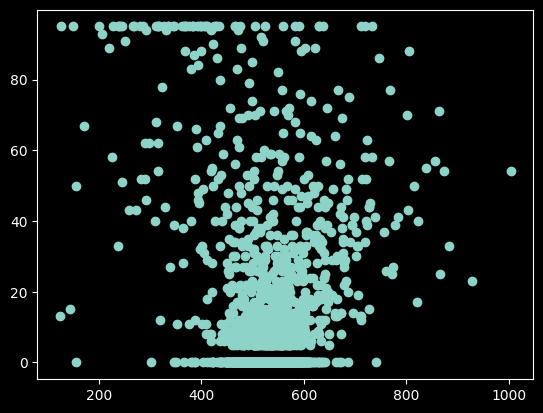

In [69]:
plt.scatter(data['Thinnest'], data['ESI.Posterior.'])

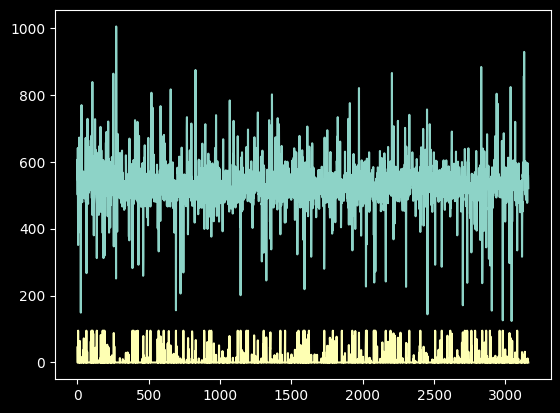

In [70]:
plt.plot(data['Thinnest'])
plt.plot(data['ESI.Anterior.'])

In [71]:
data.isnull().sum()
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3157    False
3158    False
3159    False
3160    False
3161    False
Length: 3162, dtype: bool

In [72]:
data_limpio = data.copy(deep=True)
data_limpio.drop('En.Anterior.', inplace=True, axis=1) #valores numéricos

var_thr = VarianceThreshold(threshold = 0.01) #Se quitan constantes y cuasiconstantes. Cambiando el threshold obtenemos mas o menos columnas

var_thr.fit(data_limpio.iloc[:,2: ])
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [73]:
concol = [column for column in data_limpio.iloc[:,2: ].columns 
          if column not in data_limpio.iloc[:,2: ].columns[var_thr.get_support()]]


data_limpio.drop(concol, inplace=True, axis=1)

In [74]:
#Valores numéricos
data_numerico = pd.get_dummies(data['idEye'])
data_numerico

,1000OD(Right),1000OS(Left),1001OD(Right),1001OS(Left),1002OD(Right),1002OS(Left),1003OD(Right),1003OS(Left),1004OD(Right),1004OS(Left),...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
data_num = pd.concat([data , data_numerico], axis=1).reindex(data.index)
data_num.drop(columns=['idEye', 'En.Anterior.'], axis=1, inplace=True)
data_num

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,False,False,False,False,False,False,False,False,False,False
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,False,False,False,False,False,False,False,False,False,False
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,False,False,False,False,False,False,False,False,False,False
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,False,False,False,False,False,False,False,False,False,False
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,12238,46.60,86,45.79,176,46.19,0.81,97.0,0.75,46.18,...,False,False,False,False,False,False,False,False,False,False
3158,12239,44.05,82,43.90,172,43.97,0.15,96.4,0.63,44.00,...,False,False,False,False,False,False,False,False,False,False
3159,12240,44.12,3,43.47,93,43.80,0.66,96.6,0.60,43.82,...,False,False,False,False,False,False,False,False,False,False
3160,12241,46.59,90,44.74,0,45.66,1.86,96.1,0.74,45.77,...,False,False,False,False,False,False,False,False,False,False


In [76]:
#Se codifican las etiquetas
le = LabelEncoder()
data_le = data_limpio.copy(deep = True)

In [77]:
type(data_le)

label = le.fit_transform(data_le['idEye'].values)
label

array([1638, 1637, 1822, ..., 1593, 1596, 1595], shape=(3162,))

In [78]:
data_le.drop('idEye', axis=1, inplace=True)
data_le['idEye']= label
data_le.head(10)

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,3.131,97,-0.722,3.350,1.053,3.512,99,45,27,1638
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,0.575,97,0.085,0.921,0.290,0.966,100,0,0,1637
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,0.177,9,0.268,0.263,0.640,0.692,100,0,0,1822
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,0.492,275,-0.281,3.396,1.419,3.680,100,0,29,2204
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,0.571,85,0.109,0.691,0.181,0.714,100,0,7,2203
5,68,62.98,68,42.51,158,52.74,20.47,95.5,0.25,49.96,...,3.791,45,-1.581,13.387,9.154,16.218,98,95,0,2399
6,69,44.23,85,42.86,175,43.54,1.37,96.7,0.43,43.55,...,0.269,88,0.105,0.398,0.376,0.548,100,0,0,2398
7,87,44.61,170,43.75,80,44.18,0.86,97.9,0.46,44.14,...,0.085,20,0.375,0.437,0.360,0.566,100,0,52,2592
8,88,44.13,174,43.03,84,43.58,1.10,97.2,0.46,43.52,...,0.146,229,0.353,0.371,0.485,0.611,100,0,63,2593
9,138,45.83,165,45.37,75,45.60,0.46,96.8,0.80,45.60,...,0.219,74,0.269,0.330,0.315,0.457,100,0,24,2968


<Axes: xlabel='Spherical'>

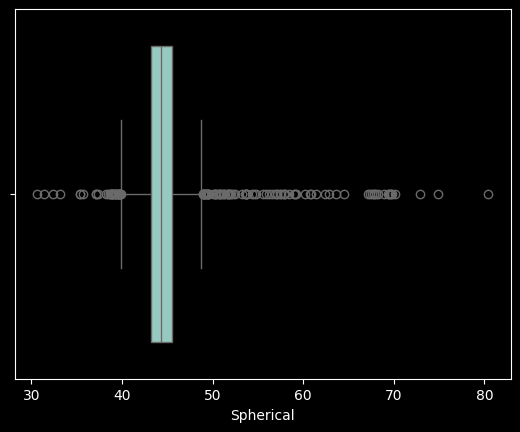

In [79]:
sns.boxplot(x='Spherical', data=data)


In [80]:
X=data_le.iloc[:,2:].values
y= labels.iloc[:,-1].values

In [81]:
le = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = le.fit_transform(X[:,i])
y = le.fit_transform(y)

In [82]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [83]:
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=None)

In [85]:
print(y_train.mean())
print(y_test.mean())

1.0368440640119092
1.0463157894736843


In [86]:
temp = data_le.iloc[:,2:]

In [87]:
X_norm = preprocessing.normalize(temp)

X_norm= pd.DataFrame(X_norm , columns= temp.columns)
X_norm.head()

,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,0.003282,0.006129,0.017347,0.006544,0.000831,0.013550,0.000142,0.006512,0.007753,0.003282,...,0.000489,0.015159,-0.000113,0.000524,0.000165,0.000549,0.015472,0.007033,0.004220,0.255990
1,0.005986,0.006517,0.019801,0.006623,0.000212,0.013538,0.000100,0.006622,0.007497,0.005986,...,0.000088,0.014889,0.000013,0.000141,0.000045,0.000148,0.015350,0.000000,0.000000,0.251275
2,0.010145,0.006826,0.023979,0.006857,0.000061,0.012758,0.000074,0.006871,0.007673,0.010145,...,0.000027,0.001383,0.000041,0.000040,0.000098,0.000106,0.015371,0.000000,0.000000,0.280067
3,0.007149,0.005931,0.019765,0.006049,0.000237,0.013639,0.000084,0.006050,0.006870,0.007149,...,0.000069,0.038549,-0.000039,0.000476,0.000199,0.000516,0.014018,0.000000,0.004065,0.308956
4,0.003960,0.006884,0.017666,0.006900,0.000034,0.014209,0.000105,0.006897,0.007706,0.003960,...,0.000087,0.012945,0.000017,0.000105,0.000028,0.000109,0.015229,0.000000,0.001066,0.335502


In [88]:
sc = StandardScaler()
sc.fit(temp.values)

t_1= sc.transform(temp.values)

X_sc = pd.DataFrame(t_1, columns=temp.columns)
X_sc.head(5)

,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,Ks.Axis.1,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,-1.297479,-1.658796,0.463478,-0.915257,1.987419,-2.400895,1.186707,-0.985057,-0.247668,-1.297479,...,2.236338,-0.725117,-1.541670,1.267779,0.255656,1.018958,-1.322918,2.108396,0.942552,0.062994
1,-0.963434,-0.496364,0.789995,-0.488707,-0.087568,-1.996732,0.388350,-0.486051,-0.446820,-0.963434,...,-0.048978,-0.725117,-0.171352,-0.081368,-0.386742,-0.170436,0.113082,-0.297716,-0.459672,0.061898
2,-0.462367,0.203248,1.279771,-0.002173,-0.603681,-3.397829,-0.133652,0.043507,-0.167490,-0.462367,...,-0.404829,-1.595166,0.139390,-0.446843,-0.092064,-0.298439,0.113082,-0.297716,-0.459672,0.264573
3,-0.740737,-0.550180,1.007674,-0.488707,0.075693,0.455188,0.234820,-0.479261,-0.402851,-0.740737,...,-0.123188,1.034757,-0.792834,1.293329,0.563805,1.097441,0.113082,-0.297716,1.046420,0.683070
4,-1.204689,0.486681,0.554177,0.231096,-0.698478,-0.622579,0.511174,0.243789,0.008385,-1.204689,...,-0.052554,-0.843760,-0.130599,-0.209118,-0.478513,-0.288161,0.113082,-0.297716,-0.096133,0.681974


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=None)

### **Entrenamiento**

Entrenamos un modelo sencillo, con nuestro dataset ya algo limpio.

In [90]:
trainedforest = RandomForestClassifier(n_estimators=500 , random_state = None).fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.96      0.99      0.98       394
           2       0.89      0.59      0.71        29
           3       1.00      0.92      0.96        12

    accuracy                           0.96       475
   macro avg       0.96      0.85      0.89       475
weighted avg       0.96      0.96      0.95       475



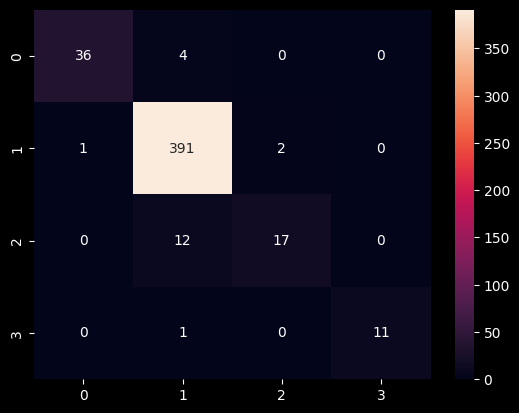

In [91]:
predictionforest = trainedforest.predict(X_test)    #para la inferencia

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')    #Una matriz de confusión, para ver el desempeño
print(classification_report(y_test, predictionforest))

In [115]:
trainedforestGS = RandomForestClassifier(n_estimators=300,
                                        min_samples_split= 5,
                                        min_samples_leaf= 1,
                                        max_features = 'sqrt',
                                        max_depth= None,
                                        bootstrap=False,
                                        random_state = None).fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.96      0.99      0.98       394
           2       0.89      0.59      0.71        29
           3       1.00      0.92      0.96        12

    accuracy                           0.96       475
   macro avg       0.96      0.85      0.89       475
weighted avg       0.96      0.96      0.95       475



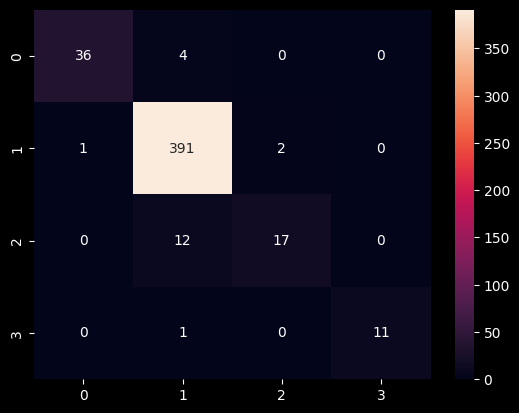

In [116]:
predictionforest1 = trainedforestGS.predict(X_test)

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest))

In [113]:
trainedforestRS = RandomForestClassifier(n_estimators= 226,
                                    max_depth= 18,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 2,
                                    min_samples_split=5,
                                    n_jobs=-1).fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.96      0.99      0.98       394
           2       0.89      0.59      0.71        29
           3       1.00      0.92      0.96        12

    accuracy                           0.96       475
   macro avg       0.96      0.85      0.89       475
weighted avg       0.96      0.96      0.95       475



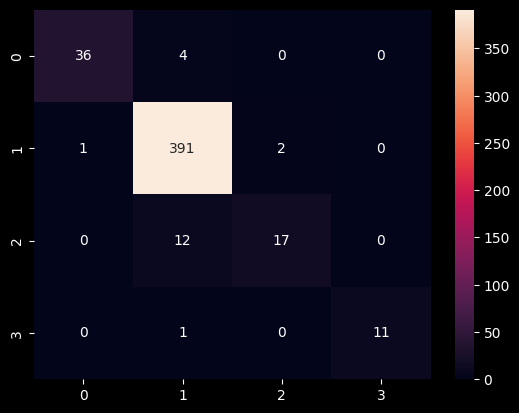

In [114]:
predictionforest2 = trainedforestRS.predict(X_test)

sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest))

### **Aplicación de PCA y Obtención de mejores variables.**

In [96]:
pca = PCA(n_components=4)
 
X_train_pca = pca.fit_transform(X_train) #fit para el entrenamiento
X_test_pca = pca.transform(X_test)

#Varianza del pca
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print('Explained variation per principal component: {}'.format(explained_variance))
print('Total explained variance: {}'.format(total_explained_variance))

Explained variation per principal component: [0.28376131 0.14369699 0.05373463 0.03928078]
Total explained variance: 0.5204737022009157


##### **Entrenamiento PCA**

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.96      0.98      0.97       394
           2       0.76      0.55      0.64        29
           3       1.00      1.00      1.00        12

    accuracy                           0.95       475
   macro avg       0.91      0.86      0.88       475
weighted avg       0.94      0.95      0.94       475



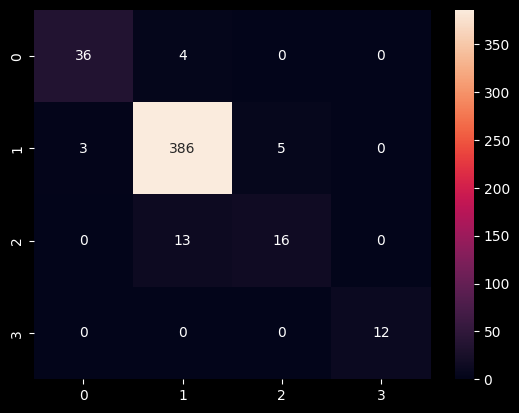

In [97]:
trainedforest_pca = trainedforest.fit(X_train_pca,y_train)

predictionforest_pca = trainedforest_pca.predict(X_test_pca)

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest_pca))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.96      0.97      0.97       394
           2       0.74      0.59      0.65        29
           3       0.92      1.00      0.96        12

    accuracy                           0.94       475
   macro avg       0.88      0.85      0.86       475
weighted avg       0.94      0.94      0.94       475



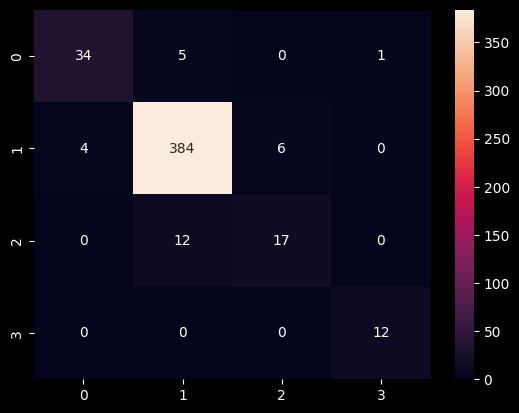

In [98]:
trainedforest_pca = trainedforestGS.fit(X_train_pca,y_train)

predictionforest_pca = trainedforest_pca.predict(X_test_pca)

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest_pca))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.96      0.98      0.97       394
           2       0.76      0.55      0.64        29
           3       1.00      1.00      1.00        12

    accuracy                           0.95       475
   macro avg       0.92      0.85      0.88       475
weighted avg       0.94      0.95      0.94       475



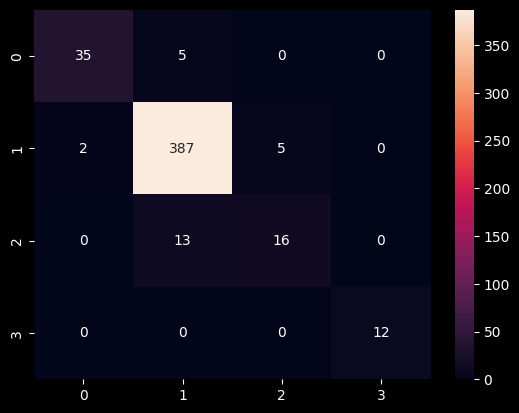

In [99]:
trainedforest_pca = trainedforestRS.fit(X_train_pca,y_train)

predictionforest_pca = trainedforest_pca.predict(X_test_pca)

sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest_pca))

##### **Mejores variables**

In [100]:
stt = StandardScaler()
temp_2 = stt.fit_transform(temp)

bestfeatures = SelectKBest(score_func=f_classif, k=10)  #las 10 mejores variables
fit = bestfeatures.fit(temp_2,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(temp.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nsmallest(50,'Score'))

              Specs     Score
85              X.1  0.030974
134  Kf.6mm..Axis.1  0.109074
158             X.6  0.118163
155             X.5  0.172489
96     Ks.6mm..Axis  0.243469
132  Ks.6mm..Axis.1  0.458998
83                X  0.523366
200            X.10  0.528028
126  Ks.0mm..Axis.1  0.675097
413           idEye  0.681758
168  Ks.6mm..Axis.2  0.904840
340          OffY.1  1.043961
207            X.12  1.248340
67   Regular.Axis.5  1.347511
164  Kf.0mm..Axis.2  1.383071
19        Kf.Axis.2  1.545354
92     Kf.0mm..Axis  1.678202
2           Kf.Axis  1.700406
11        Kf.Axis.1  1.700406
128  Kf.0mm..Axis.1  1.713013
33        LocationX  1.729454
213            X.14  1.906511
17        Ks.Axis.2  1.928462
27        Kf.Axis.3  2.090288
61   Regular.Axis.4  2.148663
231            X.18  2.165515
210            X.13  2.253056
339          OffX.1  2.436326
225            X.16  2.590206
197             X.9  2.662821
239        Ecc.4mm.  3.190621
287     LocationX.1  3.279508
204       

In [101]:
X = data_limpio.iloc[:,2:] #creating input features
full_data= X.copy()
full_data['labels'] = y
full_data.head(10)

,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,Ks.1,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,labels
0,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,49.61,...,3.131,97,-0.722,3.350,1.053,3.512,99,45,27,0
1,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,48.84,...,0.575,97,0.085,0.921,0.290,0.966,100,0,0,1
2,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,49.92,...,0.177,9,0.268,0.263,0.640,0.692,100,0,0,1
3,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,49.01,...,0.492,275,-0.281,3.396,1.419,3.680,100,0,29,0
4,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,50.60,...,0.571,85,0.109,0.691,0.181,0.714,100,0,7,1
5,62.98,68,42.51,158,52.74,20.47,95.5,0.25,49.96,70.17,...,3.791,45,-1.581,13.387,9.154,16.218,98,95,0,1
6,44.23,85,42.86,175,43.54,1.37,96.7,0.43,43.55,49.27,...,0.269,88,0.105,0.398,0.376,0.548,100,0,0,1
7,44.61,170,43.75,80,44.18,0.86,97.9,0.46,44.14,49.70,...,0.085,20,0.375,0.437,0.360,0.566,100,0,52,1
8,44.13,174,43.03,84,43.58,1.10,97.2,0.46,43.52,49.16,...,0.146,229,0.353,0.371,0.485,0.611,100,0,63,1
9,45.83,165,45.37,75,45.60,0.46,96.8,0.80,45.60,51.05,...,0.219,74,0.269,0.330,0.315,0.457,100,0,24,1


In [102]:
importancia = full_data.drop('labels', axis=1).apply(lambda x: x.corr(full_data.labels))
indices = np.argsort(importancia)
importancia[indices]

C:\Users\zahid\AppData\Local\Temp\ipykernel_7812\3774559747.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  importancia[indices]


X270deg      -0.569090
Apex.3       -0.568029
Apex         -0.568029
X225deg      -0.562127
X315deg      -0.551746
                ...   
Kf.1          0.325671
Kf            0.325708
Kf.4          0.325708
Avg_H.5mm.    0.328171
KCI           0.334041
Length: 414, dtype: float64

In [103]:
names=full_data.columns


l=[]
for i in range(0, len(indices)):
    if np.abs(importancia[i])>0.2:
        l.append(names[i])
print(l)

['Ks', 'Kf', 'AvgK', 'Ecc.9.0mm.', 'ACCP', 'Ks.1', 'Kf.1', 'AvgK.1', 'Ecc.9.0mm..1', 'Kf.2', 'AvgK.2', 'AA.2', 'Ks.3', 'Kf.3', 'AvgK.3', 'AA.3', 'Apex', 'Thinnest', 'Spherical', 'Spherical.1', 'Spherical.2', 'Spherical.3', 'Spherical.4', 'HigherOrder.4', 'Spherical.5', 'HigherOrder.5', 'Spherical.6', 'Spherical.7', 'ApexK', 'Ks.0mm.', 'Kf.0mm.', 'AvgK.0mm.', 'OSI.9mm.', 'CSI', 'ACP.3mm.', 'ApexK.1', 'Kf.0mm..1', 'AvgK.0mm..1', 'CSI.1', 'ACP.3mm..1', 'ApexK.2', 'Ks.0mm..2', 'Kf.0mm..2', 'AvgK.0mm..2', 'CSI.2', 'ACP.3mm..2', 'Highest.0mm.3mm.', 'RMS_E.3mm.', 'RMS_E.4mm.', 'RMS_E.5mm.', 'RMS_E.6mm.', 'SR_E.4mm..1', 'Ecc.9mm.', 'Ecc.12mm.', 'Ecc.15mm.', 'Avg_H.5mm.', 'Avg_H.6mm.', 'Avg_H.7mm.', 'Avg_H.8mm.', 'Avg_H.9mm.', 'SR_H.3mm..1', 'SR_H.4mm..1', 'SR_H.5mm..1', 'SR_H.6mm..1', 'Avg_H.5mm..1', 'Avg_H.6mm..1', 'Avg_H.7mm..1', 'Avg_T.6mm.', 'Sph..Keratometric.', 'Sph..Posterior.', 'Hio..Posterior.', 'Thinnest.1', 'Score.Anterior.', 'Height.Avg..Angle0.360.Dia8.FlatRate0.', 'Ks.4', 'Kf.4',

C:\Users\zahid\AppData\Local\Temp\ipykernel_7812\238368736.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(importancia[i])>0.2:


In [104]:
X = full_data[l]
X

,Ks,Kf,AvgK,Ecc.9.0mm.,ACCP,Ks.1,Kf.1,AvgK.1,Ecc.9.0mm..1,Kf.2,...,BFS.4mm.,BFS.5mm.,BFS.6mm.,BFS.7mm.,BFS.8mm.,BFS.1mm..1,SA.C40..1,SA.C40..3,SA.C40..5,ESI.Anterior.
0,44.53,39.22,41.87,0.91,41.67,49.61,43.69,46.65,0.91,-6.88,...,7.92,8.00,8.16,8.44,8.71,5.75,-0.893,0.117,-0.722,45
1,43.84,42.46,43.15,0.65,43.14,48.84,47.30,48.07,0.65,-5.96,...,7.74,7.80,7.85,7.89,7.93,6.35,0.046,-0.042,0.085,0
2,44.81,44.41,44.61,0.48,44.70,49.92,49.47,49.70,0.48,-6.26,...,7.45,7.53,7.57,7.58,7.61,6.17,0.252,-0.081,0.268,0
3,44.00,42.31,43.15,0.60,43.16,49.01,47.13,48.07,0.60,-6.99,...,7.62,7.77,7.85,7.89,7.94,5.09,-0.159,-0.202,-0.281,0
4,45.42,45.20,45.31,0.69,45.29,50.60,50.36,50.48,0.69,-6.22,...,7.39,7.43,7.48,7.52,7.58,6.11,0.097,-0.082,0.109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,46.60,45.79,46.19,0.75,46.18,51.91,51.01,51.46,0.75,-6.49,...,7.25,7.29,7.34,7.40,7.47,5.43,0.068,0.009,0.164,0
3158,44.05,43.90,43.97,0.63,44.00,49.07,48.91,48.99,0.63,-6.05,...,7.61,7.65,7.69,7.71,7.75,6.70,0.223,-0.063,0.242,0
3159,44.12,43.47,43.80,0.60,43.82,49.16,48.43,48.79,0.60,-5.99,...,7.65,7.69,7.71,7.73,7.77,6.33,0.330,-0.061,0.348,0
3160,46.59,44.74,45.66,0.74,45.77,51.91,49.84,50.87,0.74,-6.23,...,7.21,7.33,7.41,7.48,7.55,5.47,-0.085,-0.149,-0.124,0


In [105]:
y

array([0, 1, 1, ..., 1, 1, 1], shape=(3162,))

In [106]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X ,y ,train_size=0.75, random_state=None)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.94      0.97      0.96       661
           2       0.70      0.45      0.55        51
           3       1.00      0.76      0.87        17

    accuracy                           0.93       791
   macro avg       0.88      0.76      0.81       791
weighted avg       0.92      0.93      0.92       791



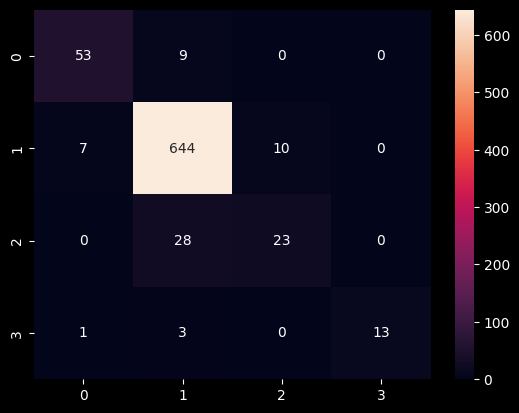

In [112]:
trainedforest1 = trainedforestGS.fit(X_train1,y_train1)

predictionforest1 = trainedforestGS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.93      0.98      0.95       661
           2       0.67      0.39      0.49        51
           3       1.00      0.76      0.87        17

    accuracy                           0.92       791
   macro avg       0.87      0.74      0.79       791
weighted avg       0.91      0.92      0.91       791



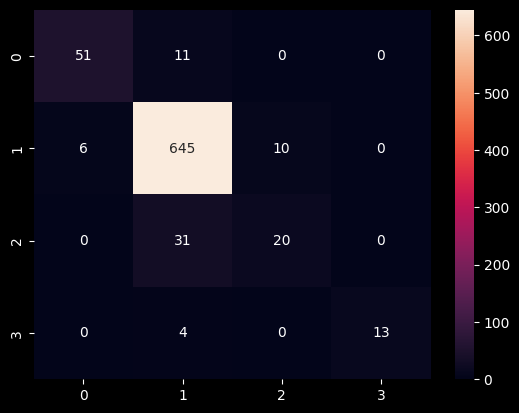

In [108]:
trainedforest1 = trainedforestRS.fit(X_train1,y_train1)

predictionforest1 = trainedforestRS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.94      0.97      0.96       661
           2       0.69      0.43      0.53        51
           3       1.00      0.94      0.97        17

    accuracy                           0.93       791
   macro avg       0.88      0.80      0.83       791
weighted avg       0.92      0.93      0.92       791



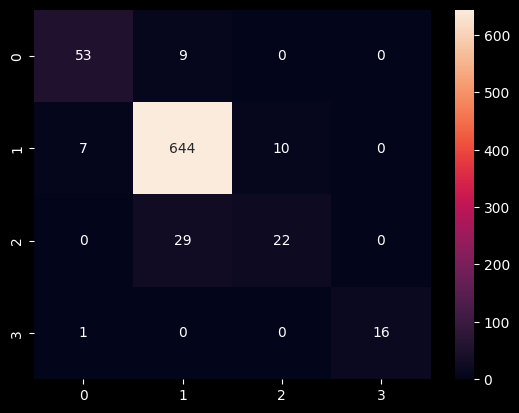

In [109]:
trainedforest1 = trainedforestGS.fit(X_train1,y_train1)

predictionforest1 = trainedforestGS.predict(X_test1)

sns.heatmap(confusion_matrix(y_test1, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test1, predictionforest1))